# Food Quality in LA County

This project would focus on the food quality of LA county restaurants. It would investigate the restaurant score pattern over both geography and time. The data is Environmental health inspections and violations in LA County restaurants downloaded from Kaggle.

The capstone project analyzes the data and aims to give useful advises to the LA County Environmental Health on when it is the best time for a random inspection and also which city should be improved most.

Below are two preliminary plots showing the inspection score variation over 36 months in 3 years and also over different city locations. From initial observations, the scores are usually low during every October. That being said, the inspection times could be increased during this month. The second plot shows an ordered score plot with respect to different cities. The 5 cities receiving the lowest scores are 'LEONA VALLEY', 'TERMINAL ISLAND', 'WESTWOOD', 'MONTEREY PARK', 'AVALON', the inspections within these 5 cities can definitely be enforced.



In [1]:
# import matplotlib.pyplot as plt
# from random import shuffle
import math
import re
import os.path
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd
from datetime import datetime

# from dateutil.parser import parse

import csv

def sort_list(list1, list2):

    zipped_pairs = zip(list2, list1)

    z = [x for _, x in sorted(zipped_pairs)]

    return z

def mean(a):
    return sum(a)/len(a)

fileStr = "/Users/lcxu2/OneDrive - Tufts/Documentation/DataIncubator/New_test/la-county-restaurant-inspections-and-violations/inspections.csv"

itercnt = 0

with open(fileStr, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='"')

    actDates = []
    scores = []

    zipCodes = []
    scoreByZip = []
    numByZip = []

    cities = []
    scoreByCity = []
    numByCity = []

    months = []
    scoreByMonth = []
    numByMonth = []

    for row in reader:
        if itercnt < 1:
            print(len(row))
            print(row)
        else:
            if row[0] != '' and row[16] != '':
                dt = datetime.strptime(row[0], '%Y-%m-%d')
                actDates.append(dt)
                val = float(row[16])
                scores.append(val)

                # Q1

                # Q2
                if row[7] != '':
                    zc = row[7]

                    if zc in zipCodes:
                        ind = zipCodes.index(zc)
                        scoreByZip[ind] += val
                        numByZip[ind] += 1
                    else:
                        zipCodes.append(zc)
                        scoreByZip.append(val)
                        numByZip.append(1)

                if row[3] != '':
                    cty = row[3]

                    if cty in cities:
                        ind = cities.index(cty)
                        scoreByCity[ind] += val
                        numByCity[ind] += 1
                    else:
                        cities.append(cty)
                        scoreByCity.append(val)
                        numByCity.append(1)

                # By year
                mon = (dt.year-2015)*12+dt.month
                if mon in months:
                    ind = months.index(mon)
                    scoreByMonth[ind] += val
                    numByMonth[ind] += 1
                else:
                    months.append(mon)
                    scoreByMonth.append(val)
                    numByMonth.append(1)


        itercnt += 1

# Mean
print('\nBasic info:\n')
print(itercnt)
print(mean(scores))
print(len(scores))

20
['activity_date', 'employee_id', 'facility_address', 'facility_city', 'facility_id', 'facility_name', 'facility_state', 'facility_zip', 'grade', 'owner_id', 'owner_name', 'pe_description', 'program_element_pe', 'program_name', 'program_status', 'record_id', 'score', 'serial_number', 'service_code', 'service_description']

Basic info:

191372
93.75330640483668
191371


In [2]:
# By cities
print('\nMetric by city\n')
print(cities)
print(len(cities))
print(scoreByCity)

meanScoreByCity = [a/b for a, b in zip(scoreByCity, numByCity)]

print(meanScoreByCity)
print(max(meanScoreByCity))


Metric by city

['GRANADA HILLS', 'TORRANCE', 'LANCASTER', 'ARTESIA', 'LOS ANGELES', 'CUDAHY', 'CLAREMONT', 'HAWAIIAN GARDENS', 'MONTEBELLO', 'CARSON', 'TOLUCA LAKE', 'HUNTINGTON PARK', 'CANOGA PARK', 'NORTHRIDGE', 'COVINA', 'LA PUENTE', 'CERRITOS', 'GLENDALE', 'LA MIRADA', 'REDONDO BEACH', 'AVALON', 'UNIVERSAL CITY', 'ROLLING HILLS ESTATES', 'GARDENA', 'BELL', 'WILMINGTON', 'BEVERLY HILLS', 'PALMDALE', 'SANTA FE SPRINGS', 'CULVER CITY', 'SAN GABRIEL', 'LAKEWOOD', 'WEST HOLLYWOOD', 'NORWALK', 'INGLEWOOD', 'SANTA MONICA', 'RANCHO PALOS VERDES', 'ALHAMBRA', 'BURBANK', 'BALDWIN PARK', 'SOUTH GATE', 'VAN NUYS', 'PICO RIVERA', 'SAN FERNANDO', 'TUJUNGA', 'MANHATTAN BEACH', 'CALABASAS', 'SAN PEDRO', 'SANTA CLARITA', 'CANYON COUNTRY', 'MARINA DEL REY', 'NEWHALL', 'LA CANADA FLINTRIDGE', 'PLAYA DEL REY', 'NORTH HILLS', 'NORTH HOLLYWOOD', 'POMONA', 'EL MONTE', 'VENICE', 'COMPTON', 'SYLMAR', 'ROSEMEAD', 'HERMOSA BEACH', 'DIAMOND BAR', 'SHERMAN OAKS', 'GLENDORA', 'MONTEREY PARK', 'DOWNEY', 'VALEN

In [3]:
sortedCities = sort_list(cities, meanScoreByCity)
meanScoreByCity.sort()

print(sortedCities)
print(meanScoreByCity)

['LEONA VALLEY', 'TERMINAL ISLAND', 'WESTWOOD', 'MONTEREY PARK', 'AVALON', 'LAWNDALE', 'GORMAN', 'ALHAMBRA', 'CENTURY CITY', 'WEST LOS ANGELES', 'GARDENA', 'RANCHO DOMINGUEZ', 'ROWLAND HEIGHTS', 'HERMOSA BEACH', 'SIGNAL HILL', 'CARSON', 'LA MIRADA', 'PLAYA VISTA', 'WEST HOLLYWOOD', 'HAWAIIAN GARDENS', 'LENNOX', 'WALNUT', 'AGUA DULCE', 'SAN PEDRO', 'LAKEVIEW TERRACE', 'LONG BEACH', 'WINNEKA', 'WILMINGTON', 'HUNTINGTON PARK', 'EAGLE ROCK', 'SEPULVEDA', 'DIAMOND BAR', 'TOPANGA', 'LOS ANGELES', 'NORTH HILLS', 'BELLFLOWER', 'INDUSTRY', 'NORWALK', 'SOUTH EL MONTE', 'SAN GABRIEL', 'SAN MARINO', 'TORRANCE', 'ATWATER', 'SAN FERNANDO', 'CERRITOS', 'ALTADENA', 'Rowland Heights', 'RANCHO PALOS VERDES', 'CUDAHY', 'EL SEGUNDO', 'HACIENDA HEIGHTS', 'SUNLAND', 'PLAYA DEL REY', 'DOWNEY', 'PACOIMA', 'MARINA DEL REY', 'VENICE', 'TUJUNGA', 'BELL GARDENS', 'BEVERLY HILLS', 'LANCASTER', 'INGLEWOOD', 'PANORAMA CITY', 'WEST COVINA', 'LEBEC', 'MONTROSE', 'HAWTHORNE', 'LA CRESCENTA', 'GLENDALE', 'COMMERCE', 'QU

In [4]:
# By month
print('\nMetric by month\n')
print(months)
print(scoreByMonth)

meanScoreByMonth = [a/b for a, b in zip(scoreByMonth, numByMonth)]

print(meanScoreByMonth)
print(max(meanScoreByMonth))


Metric by month

[29, 28, 32, 21, 17, 26, 23, 14, 20, 18, 13, 31, 12, 35, 25, 24, 34, 36, 30, 9, 27, 16, 19, 33, 15, 10, 8, 11, 22, 7]
[624660.0, 554703.0, 605659.0, 626064.0, 687232.0, 600286.0, 553521.0, 653637.0, 715861.0, 753588.0, 605337.0, 535086.0, 611653.0, 575304.0, 607165.0, 600277.0, 626839.0, 560141.0, 627111.0, 616811.0, 665765.0, 606883.0, 499256.0, 541466.0, 640208.0, 593581.0, 571956.0, 473768.0, 567022.0, 440824.0]
[93.7927927927928, 93.82662381596752, 93.25003849114704, 93.7642653886476, 93.7432819533488, 94.11821887739103, 93.91262300644723, 94.11619870410367, 93.83418534539258, 93.55530726256983, 93.99642857142857, 93.48113207547169, 93.81180981595092, 93.72825024437928, 94.09034557570122, 94.19064804644594, 93.3907926102503, 94.03072016115495, 93.64058533671793, 93.39960629921259, 93.91522076456482, 93.79953632148377, 94.02184557438795, 93.4690143276368, 93.74842583101479, 93.37439043574012, 93.5179856115108, 93.6300395256917, 93.90891023517722, 93.49395546129374]

In [5]:
sortedMeanByMon = sort_list(meanScoreByMonth, months)
months.sort()
print(months)
print(sortedMeanByMon)

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
[93.49395546129374, 93.5179856115108, 93.39960629921259, 93.37439043574012, 93.6300395256917, 93.81180981595092, 93.99642857142857, 94.11619870410367, 93.74842583101479, 93.79953632148377, 93.7432819533488, 93.55530726256983, 94.02184557438795, 93.83418534539258, 93.7642653886476, 93.90891023517722, 93.91262300644723, 94.19064804644594, 94.09034557570122, 94.11821887739103, 93.91522076456482, 93.82662381596752, 93.7927927927928, 93.64058533671793, 93.48113207547169, 93.25003849114704, 93.4690143276368, 93.3907926102503, 93.72825024437928, 94.03072016115495]


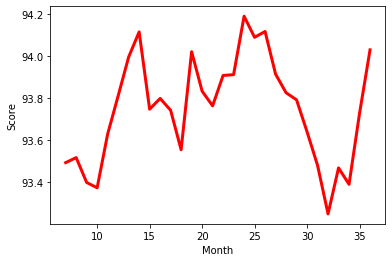

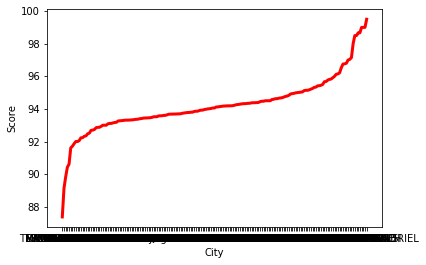

In [6]:

# Plots
plt.figure()
plt.plot(months, sortedMeanByMon, color='red', linewidth=3)

# putting labels
plt.xlabel('Month')
plt.ylabel('Score')

plt.figure()
plt.plot(sortedCities, meanScoreByCity, color='red', linewidth=3)

# putting labels
plt.xlabel('City')
plt.ylabel('Score')
plt.show()